### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Se calcula el **Ingreso total**, el **Costo de envio** y se obtiene la diferencia resultando el **Ingreso neto** de cada tienda.

In [5]:
ingreso_total_tienda_1 = sum(tienda.Precio)
costo_envio_tienda_1 = sum(tienda['Costo de envío'])
Ingreso_Neto_tienda_1 = ingreso_total_tienda_1 - costo_envio_tienda_1

ingreso_total_tienda_2 = sum(tienda2.Precio)
costo_envio_tienda_2 = sum(tienda2['Costo de envío'])
Ingreso_Neto_tienda_2 = ingreso_total_tienda_2 - costo_envio_tienda_2

ingreso_total_tienda_3 = sum(tienda3.Precio)
costo_envio_tienda_3 = sum(tienda3['Costo de envío'])
Ingreso_Neto_tienda_3 = ingreso_total_tienda_3 - costo_envio_tienda_3

ingreso_total_tienda_4 = sum(tienda4.Precio)
costo_envio_tienda_4 = sum(tienda4['Costo de envío'])
Ingreso_Neto_tienda_4 = ingreso_total_tienda_4 - costo_envio_tienda_4

print('             Ingreso          Costo de Envio          Ingreso Neto\n')
print(f'Tienda 1: {ingreso_total_tienda_1}          {costo_envio_tienda_1}            {Ingreso_Neto_tienda_1}')
print(f'Tienda 2: {ingreso_total_tienda_2}          {costo_envio_tienda_2}            {Ingreso_Neto_tienda_2}')
print(f'Tienda 3: {ingreso_total_tienda_3}          {costo_envio_tienda_3}            {Ingreso_Neto_tienda_3}')
print("\033[1m" + f'Tienda 4: {ingreso_total_tienda_4}          {costo_envio_tienda_4}             {Ingreso_Neto_tienda_4}'+ "\033[0m")

             Ingreso          Costo de Envio          Ingreso Neto

Tienda 1: 1150880400.0          61377900.0            1089502500.0
Tienda 2: 1116343500.0          59485100.0            1056858400.0
Tienda 3: 1098019600.0          58516600.0            1039503000.0
Tienda 4: 1038375700.0          55317400.0             983058300.0


Se comparan los **Ingreso netos** de las 4 tiendas y se determina que la tienda con menores **Ingresos netos** es la tienda **4**.

# 2. Ventas por categoría

Se crea la función para obtener los productos vendidos en las tiendas por categoria

In [6]:
def Ventas_Categorias(partienda):
  Ventas_Categorias = partienda['Categoría del Producto'].groupby(partienda['Categoría del Producto']).size().reset_index(name='conteo')
  Ventas_Categorias = Ventas_Categorias.sort_values(by='Categoría del Producto')
  return Ventas_Categorias


Se obtienen los productos vendidos en las tiendas por categoria

In [7]:
  Ventas_Categorias_Tienda_1=Ventas_Categorias(tienda)
  Ventas_Categorias_Tienda_2=Ventas_Categorias(tienda2)
  Ventas_Categorias_Tienda_3=Ventas_Categorias(tienda3)
  Ventas_Categorias_Tienda_4=Ventas_Categorias(tienda4)

Se genera el reporte de las ventas por categoria de las 4 tiendas ordenados por categoria del producto.

In [8]:
  categorias=[]
  ventas=[]
  ventas_2=[]
  ventas_3=[]
  ventas_4=[]
  for i in range(len(Ventas_Categorias_Tienda_1)):
    categorias.append(Ventas_Categorias_Tienda_1['Categoría del Producto'][i])
    ventas.append(int(Ventas_Categorias_Tienda_1['conteo'][i]))
    ventas_2.append(int(Ventas_Categorias_Tienda_2['conteo'][i]))
    ventas_3.append(int(Ventas_Categorias_Tienda_3['conteo'][i]))
    ventas_4.append(int(Ventas_Categorias_Tienda_4['conteo'][i]))
#  print(categorias)
  print('Categoría del Producto      Tienda 1     Tienda 2     Tienda 3     Tienda 4')
  for i in range(len(categorias)):
    espacios=30-len(categorias[i])
    text=categorias[i]+' '*espacios+str(ventas[i])+' '*10+str(ventas_2[i])+' '*10+str(ventas_3[i])+' '*10+str(ventas_4[i])
    print(text)


Categoría del Producto      Tienda 1     Tienda 2     Tienda 3     Tienda 4
Artículos para el hogar       171          181          177          201
Deportes y diversión          284          275          277          277
Electrodomésticos             312          305          278          254
Electrónicos                  448          422          451          451
Instrumentos musicales        182          224          177          170
Juguetes                      324          313          315          338
Libros                        173          197          185          187
Muebles                       465          442          499          480


Se crea la función **Ventasxcategorias()** para obtener las **etiquetas** y las **ventas** por categiría de productos por tienda.

In [12]:
def Ventasxcategorias(partienda):
  etiquetas=[]
  Ventas=[]
  for i in range(len(partienda)):
    Ventas.append(int(partienda['conteo'][i]))
    etiquetas.append(partienda['Categoría del Producto'][i])
  return etiquetas, Ventas

Se genera la grafica para una mejor visualización de la información de las ventas por categorías por tiendas.

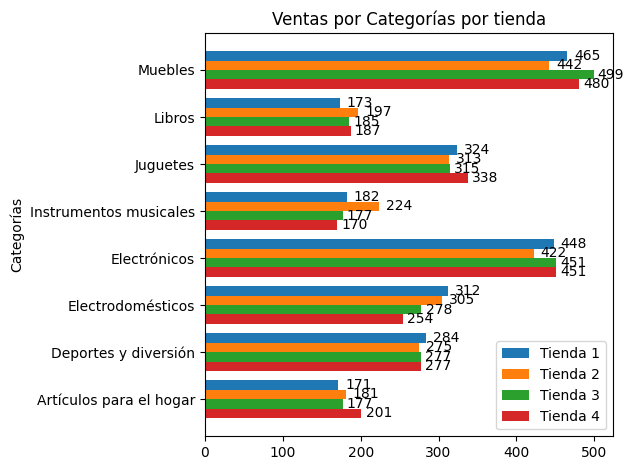

In [19]:
import matplotlib.pyplot as plt
import numpy as np
etiquetas_T1,ventas_T1=Ventasxcategorias(Ventas_Categorias_Tienda_1)
etiquetas_T2,ventas_T2=Ventasxcategorias(Ventas_Categorias_Tienda_2)
etiquetas_T3,ventas_T3=Ventasxcategorias(Ventas_Categorias_Tienda_3)
etiquetas_T4,ventas_T4=Ventasxcategorias(Ventas_Categorias_Tienda_4)

x = np.arange(len(etiquetas_T1))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(x + width*1.5, ventas_T1, width, label='Tienda 1')
rects2 = ax.barh(x + width/2, ventas_T2, width, label='Tienda 2')
rects3 = ax.barh(x - width/2, ventas_T3, width, label='Tienda 3')
rects4 = ax.barh(x - width*1.5, ventas_T4, width, label='Tienda 4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Categorías')
ax.set_title('Ventas por Categorías por tienda')
#ax.set_xticks(x, men_means)
ax.set_yticks(x, etiquetas_T1)
ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

# 3. Calificación promedio de la tienda


Se calcula la **Calificación Promedio** de cada tienda.

In [ ]:
print('Calificaciòn Promedio por tienda\n')
Promedio_calificacion_tienda_1 = round(sum(tienda['Calificación'])/len(tienda['Calificación']),2)
print(f'Calificación Promedio tienda 1: {Promedio_calificacion_tienda_1}')
Promedio_calificacion_tienda_2 = round(sum(tienda2['Calificación'])/len(tienda2['Calificación']),2)
print(f'Calificación Promedio tienda 2: {Promedio_calificacion_tienda_2}')
Promedio_calificacion_tienda_3 = round(sum(tienda3['Calificación'])/len(tienda3['Calificación']),2)
print(f'Calificación Promedio tienda 3: {Promedio_calificacion_tienda_3}')
Promedio_calificacion_tienda_4 = round(sum(tienda4['Calificación'])/len(tienda4['Calificación']),2)
print(f'Calificación Promedio tienda 4: {Promedio_calificacion_tienda_4}')

Calificaciòn Promedio por tienda

Calificación Promedio tienda 1: 3.98
Calificación Promedio tienda 2: 4.04
Calificación Promedio tienda 3: 4.05
Calificación Promedio tienda 4: 4.0


# 4. Productos más y menos vendidos

In [ ]:
def Ventas_Producto(partienda):
  Ventas_Producto = partienda['Producto'].value_counts().reset_index(name='conteo')
  Ventas_Producto = Ventas_Producto.rename(columns={'index': 'Producto'})
  producto=[]
  max_min=[]
  compara=Ventas_Producto['conteo'][0]
  for i in range(len(Ventas_Producto)):
    if i==0 or compara==Ventas_Producto['conteo'][i]:
      producto.append(Ventas_Producto['Producto'][i])
      max_min.append(int(Ventas_Producto['conteo'][i]))
    elif i==len(Ventas_Producto)-1:
      producto.append(Ventas_Producto['Producto'][i])
      max_min.append(int(Ventas_Producto['conteo'][i]))
  return producto, max_min

In [ ]:
Ventas_Producto_Tienda_1=Ventas_Producto(tienda)
Ventas_Producto_Tienda_2=Ventas_Producto(tienda2)
Ventas_Producto_Tienda_3=Ventas_Producto(tienda3)
Ventas_Producto_Tienda_4=Ventas_Producto(tienda4)

In [ ]:
print(Ventas_Producto_Tienda_1)

(['Microondas', 'TV LED UHD 4K', 'Armario', 'Celular ABXY'], [60, 60, 60, 33])


In [ ]:
tamano=[len(Ventas_Producto_Tienda_1[0]),len(Ventas_Producto_Tienda_2[0]),len(Ventas_Producto_Tienda_3[0]),len(Ventas_Producto_Tienda_4[0])]
valor_maximo=max(tamano)
compara_producto=Ventas_Producto_Tienda_1[1][0]
compara_producto2=Ventas_Producto_Tienda_2[1][0]
#print(compara_producto)
text=''
text2=''
Tienda_texto='Tienda 1'
for i in range(valor_maximo):
  if compara_producto==Ventas_Producto_Tienda_1[1][i]:
    espacios=30-len(Ventas_Producto_Tienda_1[0][i])
    text=text+Tienda_texto+' '*5+Ventas_Producto_Tienda_1[0][i]+' '*espacios+str(Ventas_Producto_Tienda_1[1][i])+'\n'
  else :
    espacios=30-len(Ventas_Producto_Tienda_1[0][i])
    text2=Tienda_texto+' '*5+text2+Ventas_Producto_Tienda_1[0][i]+' '*espacios+str(Ventas_Producto_Tienda_1[1][i])+'\n'

 # if compara_producto2==Ventas_Producto_Tienda_2[1][i]
  #  espacios=30-len(Ventas_Producto_Tienda_2[0][i])
   # text=text+Ventas_Producto_Tienda_2[0][i]+' '*espacios+str(Ventas_Producto_Tienda_2[1][i])+'\n'
print("\033[1m" +'Tienda       Producto mas vendido        Total'+ "\033[0m")

print(text)
print("\033[1m" +'             Producto memos vendido      Total'+ "\033[0m")
print(text2)
#+' '*10+str(Ventas_Producto_Tienda_2[1][i])+' '*10+str(Ventas_Producto_Tienda_3[1][i])+' '*10+str(Ventas_Producto_Tienda_4[1][i])


Tienda       Producto mas vendido        Total
Tienda 1     Microondas                    60
Tienda 1     TV LED UHD 4K                 60
Tienda 1     Armario                       60

             Producto memos vendido      Total
Tienda 1     Celular ABXY                  33



In [ ]:
def max_min_producto(partienda):
  ultimo=len(partienda)-1
  ultimo
  producto=[]
  max_min=[]
  sort_Producto = partienda.sort_values(by='conteo',ascending=False)
  for i in range(len(partienda)):
    if i==0:
      producto.append(partienda['Producto'][i])
      max_min.append(int(partienda['conteo'][i]))
    elif i==ultimo:
      producto.append(partienda['Producto'][i])
      max_min.append(int(partienda['conteo'][i]))
  return producto, max_min

In [ ]:
max_min=[]
max_min=max_min_producto(Ventas_Producto_Tienda_3)
print(max_min)

(['Ajedrez de madera', 'Vaso térmico'], [47, 38])


# 5. Envío promedio por tienda

In [14]:
print('Envìo Promedio por tienda\n')
print(f'Tienda 1:      {costo_envio_tienda_1}')
print(f'Tienda 2:      {costo_envio_tienda_2}')
print(f'Tienda 3:      {costo_envio_tienda_3}')
print("\033[1m" + f'Tienda 4:      {costo_envio_tienda_4}'+ "\033[0m")


Envìo Promedio por tienda

Tienda 1:      61377900.0
Tienda 2:      59485100.0
Tienda 3:      58516600.0
Tienda 4:      55317400.0
